####  1. Introduction


##### As part of a personal project, I conducted an exploratory data analysis using the Sample Superstore dataset. The goal was to practice the end-to-end data analysis process using Python and explore libraries such as Pandas for data manipulation, Matplotlib and Seaborn for visualization, and NumPy for numerical operations. Some of the key KPIs I worked on are listed below. This project helped me strengthen my analytical skills and improve my ability to extract actionable insights from raw data

**KPI Visualizations** 
- Bar chart: Sales by Category 
- Horizontal bar: Profit by Region 
- Line chart: Monthly Sales Trend 
- Scatter plot: Sales vs Profit
- Bar Chart or Pareto Chart: Top 10 Customers by Sales 


#### 2. Import Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 3. Load the Dataset

##### Reading the datasets from an excel file

In [46]:
df_orders = pd.read_excel('Sample - Superstore.xls',sheet_name='Orders')

In [47]:
df_people = pd.read_excel('Sample - Superstore.xls', sheet_name = 'People')

In [48]:
df_returns = pd.read_excel('Sample - Superstore.xls', sheet_name = 'Returns')

##### Joining the people and returns data set with the orders dataset

##### Preview dataset 

In [49]:
df_orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [50]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

#### 4. Data Cleaning

In [51]:
df_orders['Postal Code'] = df_orders['Postal Code'].apply(lambda x: str(int(x)) if pd.notna(x) else x).astype(object)
df_orders['Postal Code'].head(3)

0    42420
1    42420
2    90036
Name: Postal Code, dtype: object

In [52]:
df_orders.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


#### 4. Exploratory Data Analysis

KPI: Total Sales by Category

In [53]:
Sales_by_category = df_orders.groupby('Category')['Sales'].sum().reset_index()
Sales_by_category['Sales'] = Sales_by_category['Sales'].round(2)

In [54]:
Sales_by_category

,Category,Sales
0,Furniture,741999.80
1,Office Supplies,719047.03
2,Technology,836154.03


KPI Visualisation: Total Sales by Category

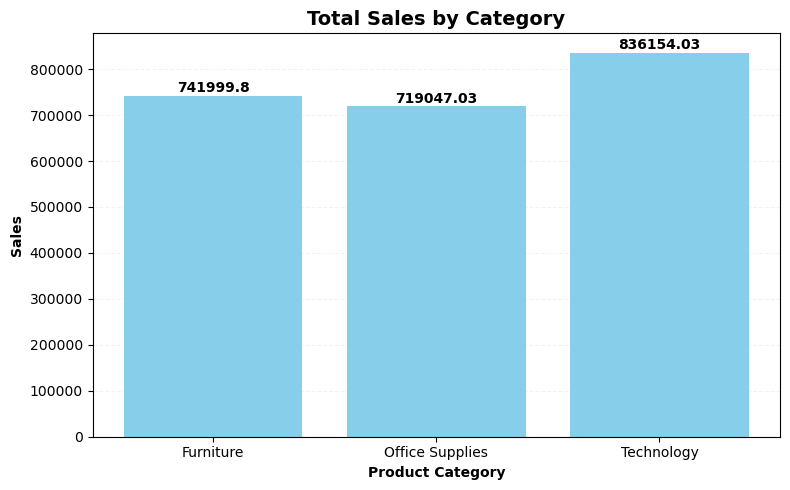

In [55]:
plt.figure(figsize =(8,5))


plt.bar(
    Sales_by_category['Category'],
    Sales_by_category['Sales'],
    color= 'skyblue'
)
plt.title("Total Sales by Category",fontsize=14,fontweight='bold')
plt.xlabel("Product Category",fontweight='bold')
plt.ylabel("Sales",fontweight='bold')

for i, val in enumerate(Sales_by_category['Sales']):
    plt.text(i,val * 1.01, str(val), ha="center", fontsize=10,fontweight='bold')

plt.grid(axis='y', linestyle="--", color='gray', alpha=0.1, linewidth=0.8)
plt.gca().set_axisbelow(True) # send grid behind bars
plt.tight_layout()


KPI:Profit by Region 

In [56]:
Profit_by_Region = df_orders.groupby('Region')['Profit'].sum().reset_index()
Profit_by_Region['Profit'] =Profit_by_Region['Profit'].round(2)


In [57]:
Profit_by_Region

,Region,Profit
0,Central,39706.36
1,East,91522.78
2,South,46749.43
3,West,108418.45


KPI Visualization: Profit by Region 

<function matplotlib.pyplot.show(close=None, block=None)>

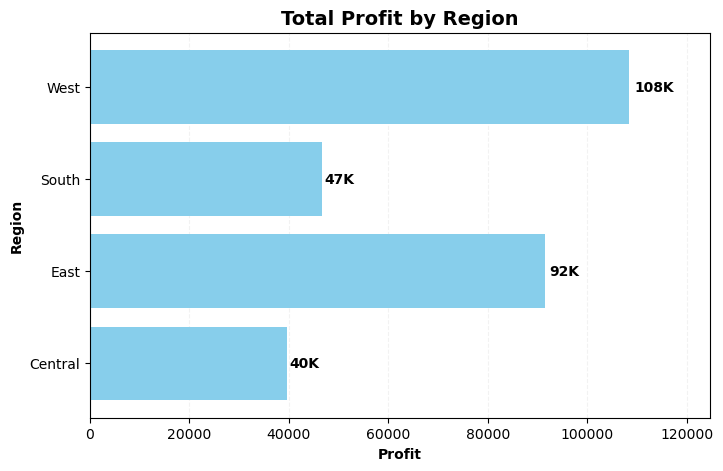

In [58]:
plt.figure(figsize=(8,5), dpi=100)

plt.barh(Profit_by_Region['Region'],Profit_by_Region['Profit'],color='skyblue')
plt.title('Total Profit by Region',fontsize= 14,fontweight='bold')
plt.ylabel("Region",fontweight='bold')
plt.xlabel('Profit',fontweight='bold')

for i, val in enumerate(Profit_by_Region['Profit']):
    plt.text(val + (0.01 * val) , i , f"{val/1000:,.0f}K", va='center', fontsize=10, fontweight='bold')

plt.xlim(0, max(Profit_by_Region['Profit']) * 1.15)
plt.grid(axis='x', linestyle="--", color='gray', alpha=0.1, linewidth=0.8)
plt.gca().set_axisbelow(True) # send grid behind bars
plt.tight_layout
plt.show

KPI:  Monthly Sales Trend

In [59]:
df_orders['Order Month'] = df_orders['Order Date'].dt.month #extracting month from order date
df_orders['Order Month Name'] = df_orders['Order Date'].dt.strftime("%b") #extracting month name from order date
df_orders['Order Year'] = df_orders['Order Date'].dt.year #extracting month from order date

In [60]:
monthly_sales_trend = df_orders[df_orders["Order Year"] == 2021].groupby(['Order Month','Order Month Name'])['Sales'].sum().reset_index().sort_values('Order Month')
monthly_sales_trend['Sales'] = monthly_sales_trend['Sales'].round(2)
monthly_sales_trend['Sales'] = monthly_sales_trend['Sales'].round(2)
monthly_sales_trend

,Order Month,Order Month Name,Sales
0,1,Jan,43971.37
1,2,Feb,20301.13
2,3,Mar,58872.35
3,4,Apr,36521.54
4,5,May,44261.11
5,6,Jun,52981.73
6,7,Jul,45264.42
7,8,Aug,63120.89
8,9,Sep,87866.65
9,10,Oct,77776.92


KPI Visualization:  Monthly Sales Trend

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

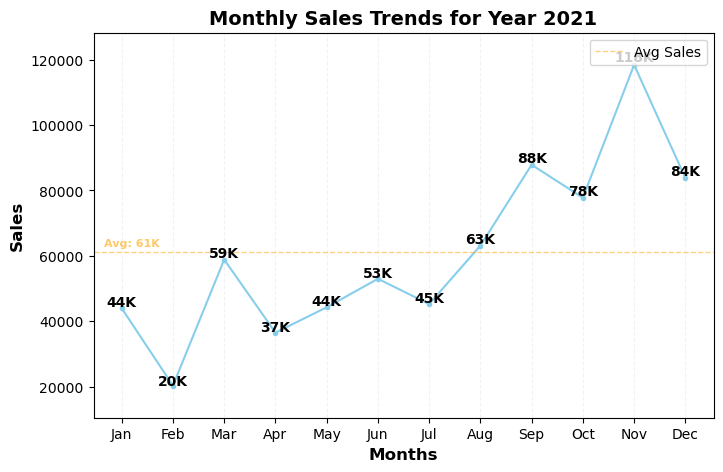

In [61]:
avg_sales = monthly_sales_trend["Sales"].mean()
plt.figure(figsize=(8,5))
plt.margins(x=0.05, y=0.1)
plt.plot(monthly_sales_trend['Order Month Name'], monthly_sales_trend['Sales'],marker="o", markersize=3, color='skyblue')
plt.title('Monthly Sales Trends for Year 2021', fontsize= 14, fontweight="bold")
plt.xlabel('Months',fontsize=12, fontweight="bold"  )
plt.ylabel('Sales',fontsize=12, fontweight="bold")
plt.axhline(avg_sales,color="orange",linestyle="--", linewidth=1, label= "Avg Sales", alpha=0.5)
  
for i, val in enumerate(monthly_sales_trend['Sales']):
    plt.text(i,val + ( 0.01 * val),f"{val/1000:,.0f}K", ha="center",fontsize=10, fontweight="bold")

plt.text(x= 0.2, y= avg_sales +(0.03 * avg_sales),s=f"Avg: {avg_sales/1000:,.0f}K", ha="center", color="orange", fontsize = 8 , fontweight="bold", alpha=0.6)
plt.grid(axis='x', linestyle="--", color='gray', alpha=0.1, linewidth=0.8)
plt.legend()
plt.tight_layout

KPI: Sales vs Profit 

In [62]:
Sales_vs_Profit = df_orders.loc[df_orders["Order Year"] == 2021,["Profit","Sales"]]

KPI Visualisation: Sales vs Profit Scatter

Note for myself:  df_orders[["Profit","Sales"]][df_orders["Profit"] > 0] or df_orders.loc[df_orders["Profit"] > 0, ["Profit","Sales"]] -- both will give same output

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

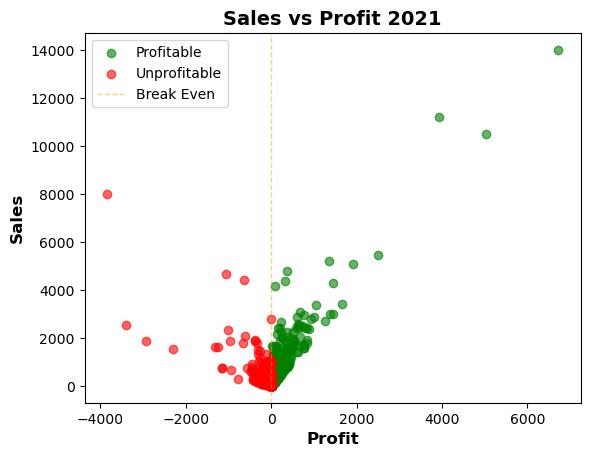

In [63]:
x = Sales_vs_Profit["Profit"]
y = Sales_vs_Profit["Sales"]

# plt.scatter(x,y, c= x.apply(lambda x: "green" if x > 0 else "red"), 
#             alpha=0.6)


plt.scatter(x[x > 0], y[x > 0],
            color="green", alpha=0.6, label="Profitable")

plt.scatter(x[x <= 0], y[x <= 0],
            color="red", alpha=0.6, label="Unprofitable")


plt.axvline(0, color="orange",linestyle="--", linewidth=1, label= "Break Even", alpha=0.5)
plt.title("Sales vs Profit 2021", fontsize=14, fontweight="bold" )
plt.xlabel("Profit",fontsize=12, fontweight="bold")
plt.ylabel("Sales",fontsize=12, fontweight="bold")

plt.legend()
plt.tight_layout

KPI: Top 10 Customers by Sales

In [64]:
top_10_customers_by_sales = df_orders.groupby('Customer Name')['Sales'].sum().reset_index().sort_values('Sales',ascending=False).head(10)

top_10_customers_by_sales['Sales'] = top_10_customers_by_sales['Sales'].astype(int)

top_10_customers_by_sales['Cumulative %'] = top_10_customers_by_sales['Sales'].cumsum() / top_10_customers_by_sales['Sales'].sum() * 100

top_10_customers_by_sales['Cumulative %'] = top_10_customers_by_sales['Cumulative %'].round(2)
top_10_customers_by_sales

,Customer Name,Sales,Cumulative %
686,Sean Miller,25043,16.28
730,Tamara Chand,19052,28.67
622,Raymond Buch,15117,38.50
757,Tom Ashbrook,14595,47.99
6,Adrian Barton,14473,57.40
441,Ken Lonsdale,14175,66.61
671,Sanjit Chand,14142,75.81
334,Hunter Lopez,12873,84.18
672,Sanjit Engle,12209,92.11
156,Christopher Conant,12129,100.00


KPI Visualisation: Top 10 Customers by Sales

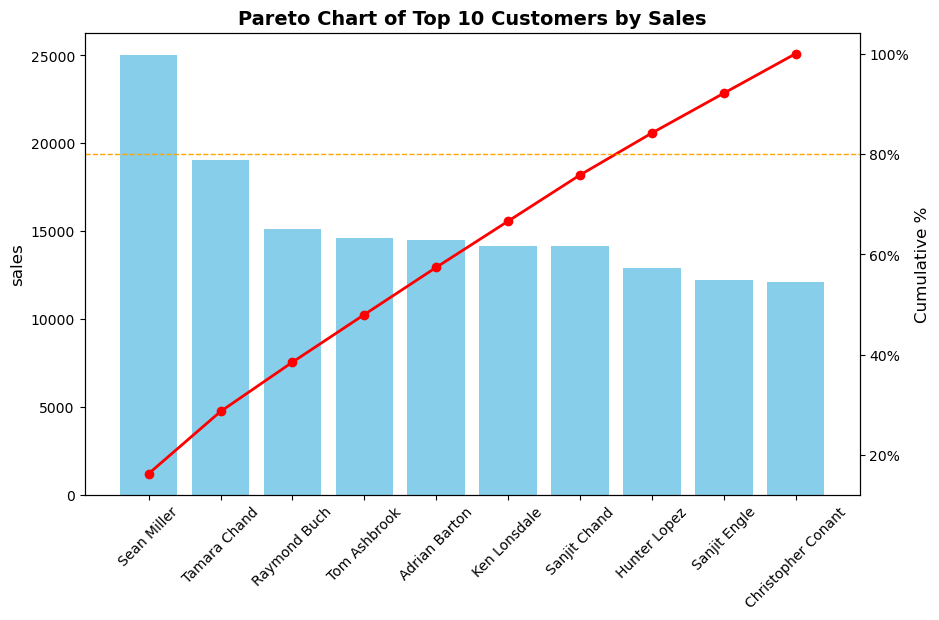

In [65]:
fig, ax1 = plt.subplots(figsize=(10,6))

#bar chart

ax1.bar(top_10_customers_by_sales['Customer Name'], top_10_customers_by_sales['Sales'], color= 'skyblue')
ax1.set_ylabel("sales", fontsize=12)
plt.xticks(rotation=45)

#line chart
ax2 = ax1.twinx()
ax2.plot(top_10_customers_by_sales['Customer Name'],top_10_customers_by_sales['Cumulative %'], color="red", marker='o', linewidth=2)
ax2.set_ylabel("Cumulative %", fontsize=12)
ax2.yaxis.set_major_formatter("{:.0f}%".format)

ax2.axhline(80,color='orange', linestyle="--", linewidth=1)


plt.title("Pareto Chart of Top 10 Customers by Sales", fontsize=14, fontweight="bold")
plt.show()